<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme du lagrangien augmenté </h1>
</center>

In [6]:
import Pkg; Pkg.add("Plots")
import Pkg; Pkg.add("LaTeXStrings")
import Pkg; Pkg.add("Measures")

   Resolving package versions...


  No Changes to `~/Documents/SN/2A/Opti/projet-optinum/Project.toml`
  No Changes to `~/Documents/SN/2A/Opti/projet-optinum/Manifest.toml`


   Resolving package versions...


  No Changes to `~/Documents/SN/2A/Opti/projet-optinum/Project.toml`
  No Changes to `~/Documents/SN/2A/Opti/projet-optinum/Manifest.toml`


   Resolving package versions...


  No Changes to `~/Documents/SN/2A/Opti/projet-optinum/Project.toml`
  No Changes to `~/Documents/SN/2A/Opti/projet-optinum/Manifest.toml`


## Implémentation

1. Implémenter l'algorithme du lagrangien augmenté, en utilisant les différentes méthodes
qui ont été vues en première partie pour la résolution de la suite de problèmes sans
contraintes (fichier `src/lagrangien_augmente.jl`). La spécification est donnée dans le fichier.
2. Vérifier que les tests ci-dessous passent.
 

In [2]:
include("../src/Lagrangien_Augmente.jl")
include("../test/tester_lagrangien_augmente.jl")
GC.gc()

#
afficher = false # si true, alors affiche les résultats des algorithmes

#
tester_lagrangien_augmente(lagrangien_augmente, afficher);

Affichage des résultats des algorithmes : false



Test Summary:         | Pass  Total  Time
Lagrangien augmenté   |   12     12  1.3s


## Interprétation

 1. Commenter les résultats obtenus, en étudiant notamment les valeurs en sortie de $\lambda_k$ et $\mu_k$.
 2. Étudier l'influence du paramètre $\tau$ dans la performance de l'algorithme. Pour cela Vous réaliserez des tests numériques.

### Question 1

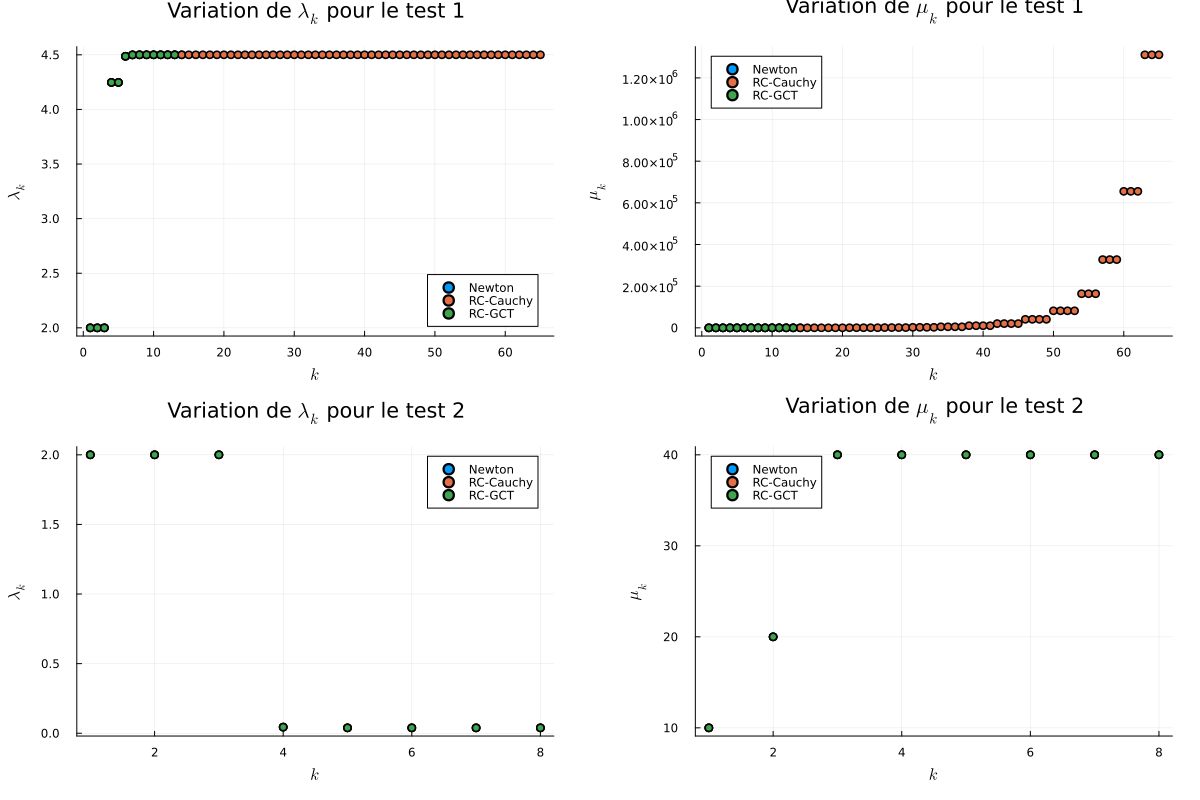

In [8]:
using Plots
using LaTeXStrings
using Measures
include("../src/Lagrangien_Augmente.jl")
include("../test/fonctions_de_tests.jl")

# point initial 1
_, _, _, _, μs1_n, λs1_n = lagrangien_augmente(fct1, grad_fct1, hess_fct1, contrainte1, grad_contrainte1, hess_contrainte1, pts2.x01, algo_noc="newton")
_, _, _, _, μs1_c, λs1_c = lagrangien_augmente(fct1, grad_fct1, hess_fct1, contrainte1, grad_contrainte1, hess_contrainte1, pts2.x01, algo_noc="rc-cauchy")
_, _, _, _, μs1_g, λs1_g = lagrangien_augmente(fct1, grad_fct1, hess_fct1, contrainte1, grad_contrainte1, hess_contrainte1, pts2.x01)

# point initial 2
_, _, _, _, μs2_n, λs2_n = lagrangien_augmente(fct2, grad_fct2, hess_fct2, contrainte2, grad_contrainte2, hess_contrainte2, pts2.x03, algo_noc="newton")
_, _, _, _, μs2_c, λs2_c = lagrangien_augmente(fct2, grad_fct2, hess_fct2, contrainte2, grad_contrainte2, hess_contrainte2, pts2.x03, algo_noc="rc-cauchy")
_, _, _, _, μs2_g, λs2_g = lagrangien_augmente(fct2, grad_fct2, hess_fct2, contrainte2, grad_contrainte2, hess_contrainte2, pts2.x03)


# point initial 1
p11 = scatter(λs1_n, ylabel=L"$\lambda_k$", label="Newton", title=L"Variation de $\lambda_k$ pour le test 1")
scatter!(λs1_c, label="RC-Cauchy")
scatter!(λs1_g, label="RC-GCT")

p12 = scatter(μs1_n, ylabel=L"$\mu_k$", label="Newton", title=L"Variation de $\mu_k$ pour le test 1")
scatter!(μs1_c, label="RC-Cauchy")
scatter!(μs1_g, label="RC-GCT")

# point initial 2
p21 = scatter(λs2_n, ylabel=L"$\lambda_k$", label="Newton", title=L"Variation de $\lambda_k$ pour le test 2")
scatter!(λs2_c, label="RC-Cauchy")
scatter!(λs2_g, label="RC-GCT")

p22 = scatter(μs2_n, ylabel=L"$\mu_k$", label="Newton", title=L"Variation de $\mu_k$ pour le test 2")
scatter!(μs2_c, label="RC-Cauchy")
scatter!(μs2_g, label="RC-GCT")


scatter(p11,p12,p21,p22, size=(1200,800), xlabel=L"$k$", margin=5mm, layout=(2,2))

On remarque que la valeur de $\lambda_k$ en sortie est élevée pour $f_1$, indiquant ainsi que la solution du problème sans contrainte ne satisfait pas les contraintes, c'est l'inverse pour $f_2$ et on converge très vite vers une solution. Quand à $\mu_k$ il diminue de manière significative le nombre d'itérations nécessaires. On remarque aussi que la valeur finale de $\mu_k$ a augmenté à chaque itération, suggérant ainsi que les contraintes n'ont pas été respectées, nécessitant plusieurs pénalités successives pour les satisfaire.

### Question 2

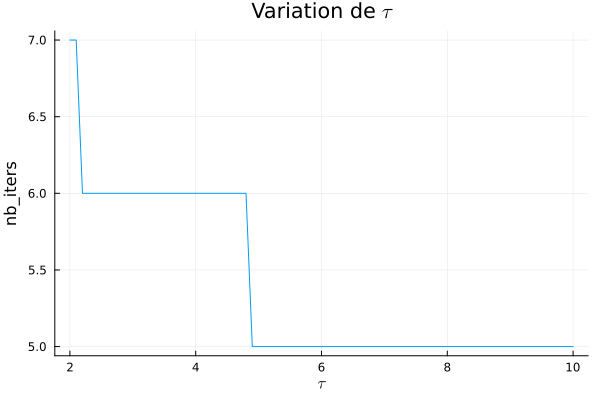

In [4]:
using Plots
using LaTeXStrings
include("../src/Lagrangien_Augmente.jl")
include("../test/fonctions_de_tests.jl")

x0 = pts2.x03
τ = 2:0.1:10

iters = []

for t in τ
    _, _, _, nb_iters, _, _ = lagrangien_augmente(fct2, grad_fct2, hess_fct2, contrainte2, grad_contrainte2, hess_contrainte2, x0, τ=t)
    push!(iters,nb_iters)
end

plot(τ,iters, title=L"Variation de $\tau$", xlabel=L"$\tau$", ylabel="nb_iters", label=false)

On remarque donc que le l'algorithme converge plus rapidement pour $\tau \geq$ 2. On préviligera un $\tau$ grand.  